# Brief 11 - KNN  
  
### Jeux de données:
- Breast_Cancer.csv  
  
### Contenu du git:
- Ce fichier: brief11-KNN-rendu.ipynb
- Le sujet: Classification de patients souffrant d’un cancer.pdf  
  
### Sujet:  
Classification de patients souffrant d’un cancer.pdf  
  
### Ressources:
1. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
2. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
3. http://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/
4. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
5. https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn
6. https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins#:~:text=En%20reconnaissance%20de%20forme%2C%20l,la%20classification%20et%20la%20r%C3%A9gression.&text=en%20r%C3%A9gression%20k%2DNN%2C%20le,des%20k%20plus%20proches%20voisins​ .
7. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
  
Pour aller plus loin:
8. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron
9. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido
10. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves  
  
Autres ressources:
1. Chaîne Machine Learnia : https://www.youtube.com/channel/UCmpptkXu8iIFe6kfDK5o7VQ
2. Machine Learnia cross validation: https://www.youtube.com/watch?v=w_bLGK4Pteo&t=1174s
3. Machine Learnia cross validation: https://www.youtube.com/watch?v=VoyMOVfCSfc&t=4s
4. Machine Learnia KNN: https://www.youtube.com/watch?v=P6kSc3qVph0&t=2s
2. Mise en oeuvre courbe roc: http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_color.html

## Points 1 à 3:  
1. Réaliser l'analyse exploratoire des données
2. Visualiser les données
3. Déclarer le vecteur de caractéristiques et la variable cible

In [1]:
#
#-------------------------------------- Importation bibliothèque ------------------------------------------------------
#

import pandas as pds
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# sklearn
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score
from sklearn.metrics import auc

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn import metrics

#
#-------------------------------------- Classes pour le bief ------------------------------------------------------
#

class B11:

    def normal(xtrain, xtest, algo_normalisation= StandardScaler): #, algo_normalisation= StandardScaler
        norm= algo_normalisation()
        xtrainnorm= norm.fit_transform(xtrain)
        xtestnorm= norm.fit_transform(xtest)
        return xtrainnorm, xtestnorm

    def OptimisationParametreNVoisin(x_train, x_test, y_train, y_test, plage= range(1,15)):
        res= []

        for k in plage:
            classifier_KNN = KNeighborsClassifier(n_neighbors= k)
            classifier_KNN.fit(x_train, y_train)
            res.append([classifier_KNN.score(x_test, y_test),k])

        res= np.array(res).T
        return res

    def EncodeLabel(y):
        le = LabelEncoder()
        yenc= le.fit_transform(y)
        return yenc

    def ch_tri_inv(tab):
        ind= np.argsort(tab[0])
        ind= ind[::-1]
        #print(ind)
        ch1= 'Précision: Nb voisin:\n'
        tri= [ [tab[0][i], int(tab[1][i])] for i in ind]
        for i in range(0, len(tri)):
            ch1 = ch1 + f"{100 * tri[i][0]:.2f} %" + ' : ' + f"{tri[i][1]:02d}" + '\t'
        #print(ch)
        return ch1


    def ma_confuse(p, mc, n, std):
        print(f"Pour un KNN de {n} voisins dont les données ont été normalisées par {std} les résultats sont:")
        print(f"La précision du modèle est de {100 * p:.2f} %.")
        print(f"La matrice de confusion donne:\n{mc[0][0]} de vrai positif pour {mc[0][1]} de faux positif soit une précision de \
{100 * mc[0][0]/(mc[0][0]+mc[0][1]):.2f} %.\n{mc[1][1]} de vrai négatif pour {mc[1][0]} de faux négatif soit une précision de \
{100 * mc[1][1]/(mc[1][0]+mc[1][1]):.2f} %.")


    def stats_cross_val(norm, x, y, cv, voisin):

        # On utilisera "STRATIFIED K-FOLD" plutôt que le KFold car le jeux de donnée n'est pas homogène (37.2% / 62.8%) 
        score= cross_val_score(KNeighborsClassifier(voisin), x, y, cv= cv, scoring= "accuracy")
        ch= ''
        for i in range(0,cv):
            #print(score[i])
            ch= ch + f"{100 * score[i]:.2f} %" + ", "
        ch= ch[:len(ch)-2]
        
        print(f"\nCross Validation. Les données ont été standardisé par la méthode {norm}. Le nombre de voisins est {voisin}.")
        print(f"La précision obtenu sur les {cv} échantillons est de {ch}. La moyenne des scores est: {100*score.mean():.2f} % et \
l'écart type de {100*score.std():.2f} %.")


In [2]:
# Importer les données
crabe= pds.read_csv("Breast_Cancer.csv")
print(f"Taille du jeux de donnée: {crabe.shape[0]} lignes x {crabe.shape[1]} colonnes.")
#print(crabe.info())


Taille du jeux de donnée: 569 lignes x 33 colonnes.


On remarque la présence d'une **33 ème colonnes** "Unnamed: 32" (pour peut qu'on prenne le soin de décommenter le print info!). Cette colonne ne contient aucunes données et est généré à cause d'une virgule dans le fichier csv située à la fin de la première ligne.  
D'autre part, la **colonne "id"** ne contient aucune donnée qui nous intéresse pour l'étude du data set.
- **On supprimera ces colonnes**
  
La colonne **"diagnosis"** sera extraite et sera la **variable cible**. Les **autres données** composeront **le vecteur de caractéristiques**.

In [3]:
crabe.drop("Unnamed: 32", axis= 1, inplace= True)
crabe.drop("id", axis= 1, inplace= True)
diagnostic= crabe.diagnosis
crabe.drop("diagnosis", axis= 1, inplace= True)

Dans ce jeux de données, 212 sont atteintes d'une tumeur cancéreuse et 357 ont une tumeur bénigne.

Le jeux de donnée n'est donc pas équilibré avec 37.26% de tumeur cancéreuse et 62.74% de tumeur bénigne.


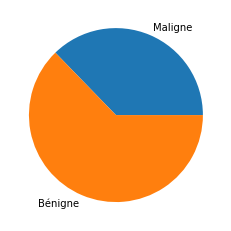

In [4]:
# A DECOMMENTER POUR AFFICHAGE DES STATS

#print(crabe.info())
#pds.set_option('display.max_columns', None)
#print(crabe.describe())
#print(diagnostic.unique()) # Vérifie que l'on à que 2 possible pour cette variable: M= Maligne ou B= Bénin

m= diagnostic[diagnostic== 'M'].size
b= diagnostic[diagnostic== 'B'].size
    
print(f"Dans ce jeux de données, {m} sont atteintes d'une tumeur cancéreuse et {b} ont une tumeur bénigne.")

print(f"\nLe jeux de donnée n'est donc pas équilibré avec {100*m/(m+b):.2f}% de tumeur cancéreuse et {100*b/(m+b):.2f}% de tumeur bénigne.")
_= plt.pie([m, b], labels= ["Maligne","Bénigne"])


Les données sont maintenant réparties dans 2 tableaux:
- L'un contenant les variables d'entrées
- L'autre contient les labels.
  
Les noms de colonnes sont les suivants:  
<p style="text-align: center;"><b>Liste des colonnes du jeux de données originel:</b></p>

| | | | | | | | |
|---|-----------|---------------|---------------|---------------|-----------|-------------------|-------------------|
|id	|diagnosis	|radius_mean	|texture_mean	|perimeter_mean	|area_mean	|smoothness_mean	|compactness_mean	|
| | | | | | | | |
|concavity_mean	|concave points_mean	|symmetry_mean	|fractal_dimension_mean	|radius_se	|texture_se	|perimeter_se	|area_se	|smoothness_se	|
| | | | | | | | |
compactness_se	|concavity_se	|concave points_se	|symmetry_se	|fractal_dimension_se	|radius_worst	|texture_worst	|perimeter_worst	|
| | | | | | | | |
area_worst	|smoothness_worst	|compactness_worst	|concavity_worst	|radius_worst	|texture_worst	|perimeter_worst	|concave points_worst	|symmetry_worst	|fractal_dimension_worst|
| | | | | | | | |




## Point 4, 5 et 6:  
4. Divisez les données en un ensemble d'entraînement et de test séparé    
5. Feature engineering  
Il n'y a pas de problème de valeurs de type Nan ou None. Nous pouvons passer au point suivant.  
6. Feature scaling

In [5]:
# Découpe du jeux de donnée en jeux d'entrainement et de test
x_entrainement, x_test, y_entrainement, y_test = train_test_split(crabe, diagnostic, test_size=0.2, shuffle= False)

# Normalisation avec LabelEncoder
y_entrainement= B11.EncodeLabel(y_entrainement)
y_test= B11.EncodeLabel(y_test)

# Normalisation des données d'entrainement et de test
x_entrainement_std, x_test_std= B11.normal(x_entrainement, x_test, algo_normalisation= StandardScaler)
x_entrainement_minmax, x_test_minmax= B11.normal(x_entrainement, x_test, algo_normalisation= MinMaxScaler)
x_entrainement_robuste, x_test_robuste= B11.normal(x_entrainement, x_test, algo_normalisation= RobustScaler)


In [6]:
print("Vérifions que les données mise à l'échelles donnent des courbes identiques aux données brutes.")

#_= pds.DataFrame(x_entrainement_std).hist(figsize=(17, 17), rwidth = 0.8, bins= 20)

# DECOMMENTER LA LIGNE CI DESSUS POUR AFFICHAGE DES COURBES 

Vérifions que les données mise à l'échelles donnent des courbes identiques aux données brutes.


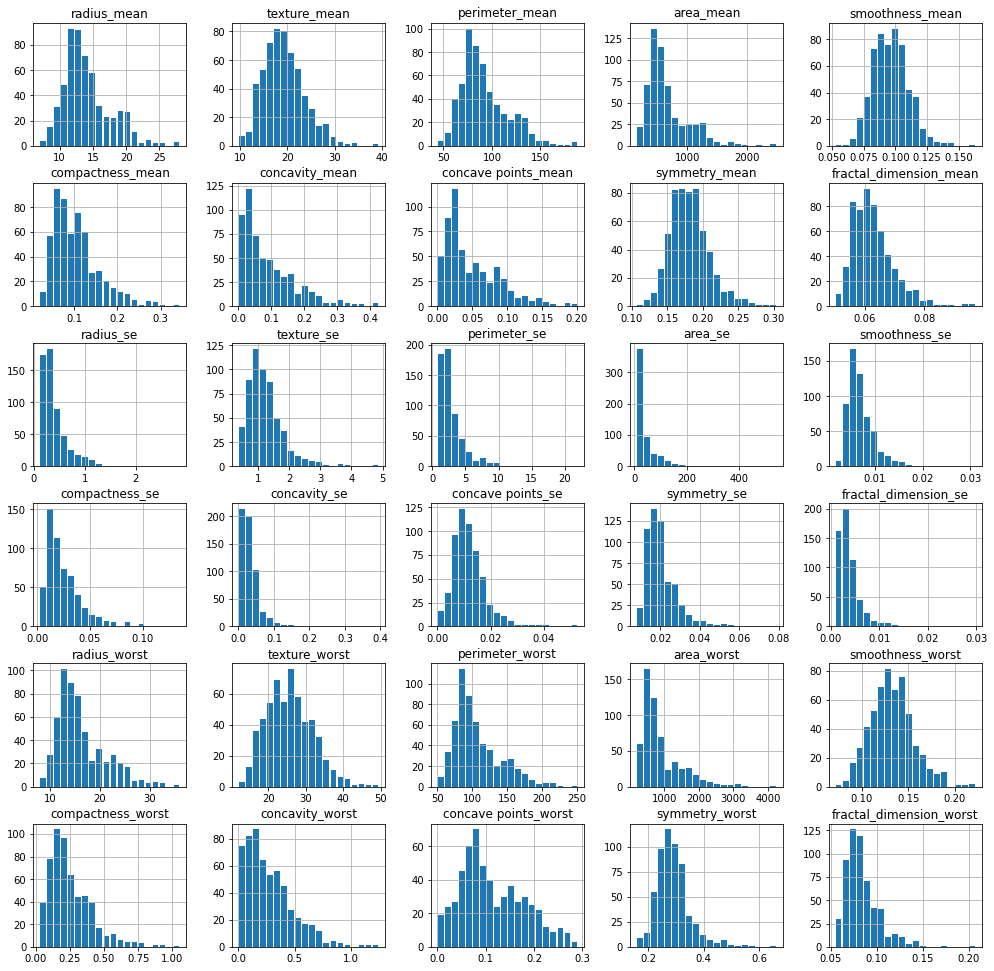

In [7]:
_= crabe.hist(figsize=(17, 17), rwidth = 0.8, bins= 20)

# DECOMMENTER LA LIGNE CI DESSUS POUR AFFICHAGE DES COURBES 

## Représentation des données (utilisation de la pca)  
Il ne s'agit la que d'une représentation de la dispertion des données fortement dégradé par la compression utilisé (réduction de 30 à 2 dimensions). Mais il semble que **les données formes 2 groupes distincts et relativement simple à séparer**. Une régression linéaire ou logistique pourraient être pertinente ? Je les testeraient à la fin de ce brief si j'en ai le temps.  
Une représentation 3D du data set réduit en 3 dimensions confirme une séparation des données en 2 groupes distinct

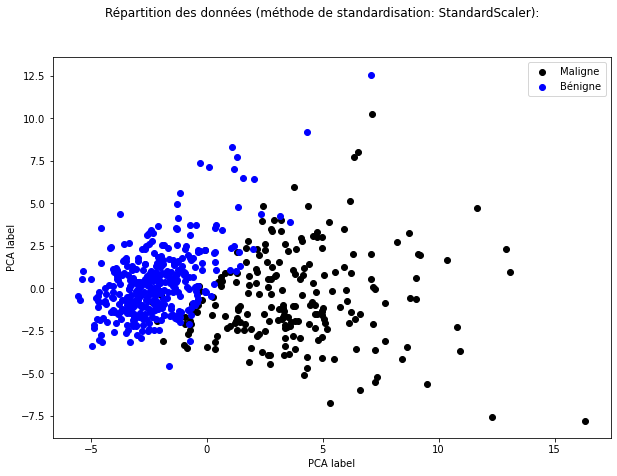

In [8]:
modpca= PCA(n_components= 2)
crabe_std= StandardScaler().fit_transform(crabe)
visu= (modpca.fit_transform(crabe_std))

visum= (visu[diagnostic== 'M']).T
visub= (visu[diagnostic== 'B']).T

fig, axs = plt.subplots(1, 1, figsize=(10, 7))

axs.scatter(visum[0], visum[1], marker='o', c= "black", label= "Maligne")
axs.scatter(visub[0], visub[1], marker='o', c= "blue", label= "Bénigne")
axs.set_xlabel('PCA label')
axs.set_ylabel('PCA label')
axs.legend()

_= fig.suptitle("Répartition des données (méthode de standardisation: StandardScaler):")


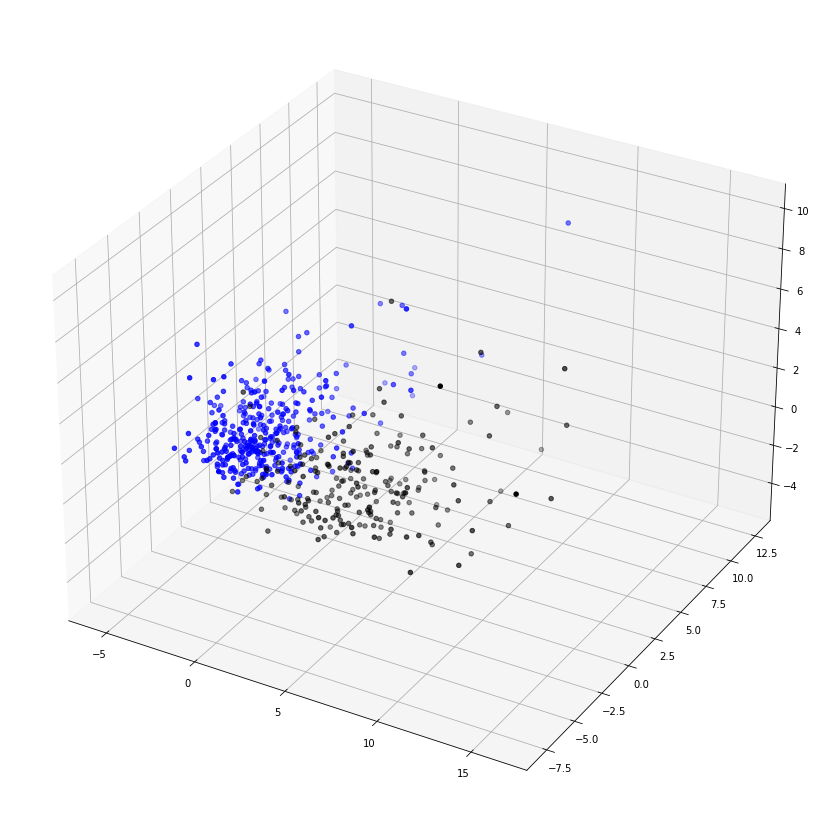

In [9]:
modpca= PCA(n_components= 3)
crabe_std= StandardScaler().fit_transform(crabe)
visu= (modpca.fit_transform(crabe_std))

visum= (visu[diagnostic== 'M']).T
visub= (visu[diagnostic== 'B']).T

fig= plt.figure(figsize= (20,15))
ax = plt.axes(projection ="3d")
 
# Creating plot
_= ax.scatter3D(visum[0], visum[1], visum[2], color = "black")
_= ax.scatter3D(visub[0], visub[1], visub[2], color = "blue")


## Point 7 et 10 :  
7. Ajuster le classificateur à l'ensemble d'entraînement
10. Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k  
  
On recherchera la valeur de l'hyperparamètre n_neighbors pour laquelle la précision est la meilleure. On réalisera le test avec toutes les méthodes utilisées pour réaliser les mises à l'échelle ainsi qu'un test sans que les données soient mises à l'échelle.  
Problème: Comment éviter l'overfitting.... ?

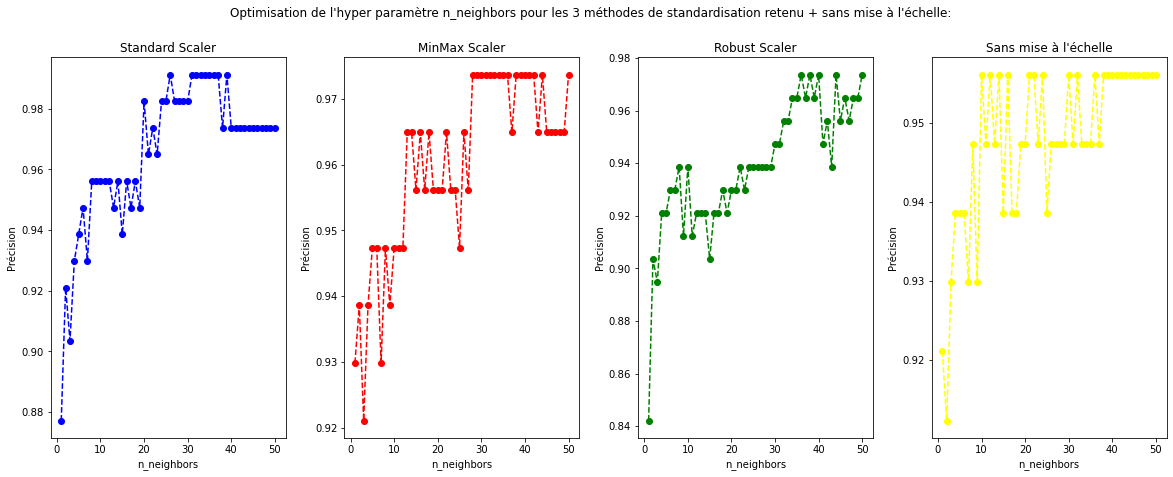

In [10]:
plage= range(1,51)
resstd= B11.OptimisationParametreNVoisin(x_entrainement_std, x_test_std, y_entrainement, y_test, plage= plage)

resminmax= B11.OptimisationParametreNVoisin(x_entrainement_minmax, x_test_minmax, y_entrainement, y_test, plage= plage)

resrobust= B11.OptimisationParametreNVoisin(x_entrainement_robuste, x_test_robuste, y_entrainement, y_test, plage= plage)

res= B11.OptimisationParametreNVoisin(x_entrainement, x_test, y_entrainement, y_test, plage= plage)

fig, axs = plt.subplots(1, 4, figsize=(20, 7))
plt.gcf().subplots_adjust(wspace = 0.25)

axs[0].plot(resstd[1], resstd[0],linestyle='dashed', marker='o', color= "blue")
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Précision')
axs[0].set_title('Standard Scaler')

axs[1].plot(resminmax[1], resminmax[0],linestyle='dashed', marker='o', color= "red")
axs[1].set_xlabel('n_neighbors')
axs[1].set_ylabel('Précision')
axs[1].set_title('MinMax Scaler')

axs[2].plot(resrobust[1], resrobust[0],linestyle='dashed', marker='o', color= "green")
axs[2].set_xlabel('n_neighbors')
axs[2].set_ylabel('Précision')
axs[2].set_title('Robust Scaler')

axs[3].plot(res[1], res[0],linestyle='dashed', marker='o', color= "yellow")
axs[3].set_xlabel('n_neighbors')
axs[3].set_ylabel('Précision')
axs[3].set_title("Sans mise à l'échelle")

_= fig.suptitle("Optimisation de l'hyper paramètre n_neighbors pour les 3 méthodes de standardisation retenu + sans mise à l'échelle:")


In [11]:
print("Affichage sous forme de tableau:\n")
print(f"Standardisation StandardScaler, tableau trié:\n{B11.ch_tri_inv(resstd)}")
print(f"\nStandardisation MinmaxScaler, tableau trié:\n{B11.ch_tri_inv(resminmax)}")
print(f"\nStandardisation RobustScaler, tableau trié:\n{B11.ch_tri_inv(resrobust)}")
print(f"\nSans standardisation, tableau trié:\n{B11.ch_tri_inv(res)}")


Affichage sous forme de tableau:

Standardisation StandardScaler, tableau trié:
Précision: Nb voisin:
99.12 % : 33	99.12 % : 34	99.12 % : 35	99.12 % : 36	99.12 % : 37	99.12 % : 26	99.12 % : 31	99.12 % : 39	99.12 % : 32	98.25 % : 30	98.25 % : 25	98.25 % : 28	98.25 % : 27	98.25 % : 24	98.25 % : 20	98.25 % : 29	97.37 % : 49	97.37 % : 22	97.37 % : 50	97.37 % : 38	97.37 % : 48	97.37 % : 41	97.37 % : 42	97.37 % : 43	97.37 % : 44	97.37 % : 45	97.37 % : 46	97.37 % : 40	97.37 % : 47	96.49 % : 23	96.49 % : 21	95.61 % : 08	95.61 % : 09	95.61 % : 10	95.61 % : 12	95.61 % : 11	95.61 % : 16	95.61 % : 14	95.61 % : 18	94.74 % : 13	94.74 % : 17	94.74 % : 19	94.74 % : 06	93.86 % : 15	93.86 % : 05	92.98 % : 07	92.98 % : 04	92.11 % : 02	90.35 % : 03	87.72 % : 01	

Standardisation MinmaxScaler, tableau trié:
Précision: Nb voisin:
97.37 % : 50	97.37 % : 39	97.37 % : 28	97.37 % : 29	97.37 % : 31	97.37 % : 32	97.37 % : 33	97.37 % : 34	97.37 % : 35	97.37 % : 36	97.37 % : 38	97.37 % : 30	97.37 % : 40	97.37 % : 4

Les meilleurs résultats sont obtenus avec la normalisation obtenu grace au **standard scaler** avec un score de 99.12 %.  
Le nombre de voisins correspondant à ce score est de 33, 34, 35, 36, 37, 26, 31, 39 et 32.  
  
Quel paramètrage choisir, celui avec le nombre minimum de voisins, celui avec le maximum de voisin ou une valeur intermédiare entre ces 2 extrêmes?  
La visualisation de la courbe m'incite à ne pas retenir 26 qui semble être au milieu d'une zone ayant un taux de réussite légèrement plus faible. Même remarque pour 39. Je **choisi donc le point médian** de la série 31, 32, 33, **34**, 35, 36 et 37 soit 34. 


## 8. Prédire les résultats du test​ (predict() et predict_proba())

In [12]:
classifier_KNN = KNeighborsClassifier(n_neighbors= 34)
classifier_KNN.fit(x_entrainement_std, y_entrainement)

print(f"Précision obtenue: {100*classifier_KNN.score(x_test_std, y_test):.2f}%")

y_pred = classifier_KNN.predict(x_test_std)

print(classification_report(y_test,y_pred, target_names= ["Bénigne", "Maligne"]))


Précision obtenue: 99.12%
              precision    recall  f1-score   support

     Bénigne       1.00      0.99      0.99        88
     Maligne       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Probabilité associé à chaque donnée x_test:
précision: 68.09%, écart type: 0.3646


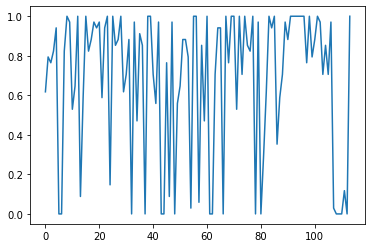

In [13]:
y_pred_prob = classifier_KNN.predict_proba(x_test_std)
print(f"Probabilité associé à chaque donnée x_test:\nprécision: {100*y_pred_prob[:,0].mean():0.2f}%, écart type: {y_pred_prob[:,0].std():.4f}")
#plt.scatter(y_pred_prob[1],y_pred_prob[0])
_= plt.plot(range(0,len(y_pred_prob)),y_pred_prob[:,0])

#_= plt.plot(range(0,len(y_pred_prob)),y_pred_prob[:,1])

## 9. Vérifiez le score de précision :  
Comparez la précision du modèle avec une précision nulle. La précision du modèle sur ce jeu de données devrait être très élevée. Mais, nous ne pouvons pas dire que notre modèle est très bon basé seulement sur cette prédiction. Nous devons le comparer avec la précision nulle.  
La précision nulle est la précision qui pourrait être obtenue en prédisant toujours la classe la plus fréquente. Vous devez donc vérifier la distribution des classes dans l'ensemble de test. On vérifie donc dans un premier temps la distribution des classes dans l'ensemble de test. (Chez moi les occurrences de la classe la plus fréquente sont 85. je calcule une précision nulle en divisant 85 par le nombre total d'occurrences. le score de précision nul est de 0,6071).

In [14]:
voisin= 34
metric= ["euclidean", "manhattan", "chebyshev", "minkowski"]

modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metric[0])
modelKNN.fit(x_entrainement_std, y_entrainement)
precision= modelKNN.score(x_test_std, y_test)

# Nombre d'occurence dans le jeux de test:
mt= y_test[y_test== 1].size
bt= y_test[y_test== 0].size
mt,bt
score_precision_nul= bt/(mt+bt)
print(f" le score de précision nulle est de {100*score_precision_nul:.2f}% à comparer au {100*precision:.2f}% du modèle avec metric= euclidean.")


 le score de précision nulle est de 77.19% à comparer au 99.12% du modèle avec metric= euclidean.


In [15]:
modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metric[1])
modelKNN.fit(x_entrainement_std, y_entrainement)
precision= modelKNN.score(x_test_std, y_test)

print(f" le score de précision nulle est de {100*score_precision_nul:.2f}% à comparer au {100*precision:.2f}% du modèle avec metric= manhattan.")


 le score de précision nulle est de 77.19% à comparer au 97.37% du modèle avec metric= manhattan.


In [16]:
modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metric[2])
modelKNN.fit(x_entrainement_std, y_entrainement)
precision= modelKNN.score(x_test_std, y_test)

print(f" le score de précision nulle est de {100*score_precision_nul:.2f}% à comparer au {100*precision:.2f}% du modèle avec metric= chebyshev.")


 le score de précision nulle est de 77.19% à comparer au 92.11% du modèle avec metric= chebyshev.


In [17]:
modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metric[3])
modelKNN.fit(x_entrainement_std, y_entrainement)
precision= modelKNN.score(x_test_std, y_test)

print(f" le score de précision nulle est de {100*score_precision_nul:.2f}% à comparer au {100*precision:.2f}% du modèle avec metric= minkowski.")


 le score de précision nulle est de 77.19% à comparer au 99.12% du modèle avec metric= minkowski.


**On note ici que le paramètre metric à une influence sur le résultat. Avec voisin= 34, on à un précision de:**
* 99,12% avec metric= euclidean
* 97,37% avec metric= manhattan
* 92,11% avec metric= chebyshev
* 99,12% avec metric= minkowski



## 11. Matrice de confusion.  
La matrice de confusion vous donnera une image claire de la
performance du modèle de classification et des types d'erreurs produites par le
modèle. Elle affiche un résumé des prévisions correctes et incorrectes ventilées par
catégorie.


In [18]:
voisin= 34
classifier_KNN = KNeighborsClassifier(n_neighbors= voisin)
classifier_KNN.fit(x_entrainement_std, y_entrainement)

precision= classifier_KNN.score(x_test_std, y_test)

y_pred = classifier_KNN.predict(x_test_std)

matrice_confusion= confusion_matrix(y_test,y_pred)

B11.ma_confuse(precision, matrice_confusion, voisin, "StandardScaler")


Pour un KNN de 34 voisins dont les données ont été normalisées par StandardScaler les résultats sont:
La précision du modèle est de 99.12 %.
La matrice de confusion donne:
87 de vrai positif pour 1 de faux positif soit une précision de 98.86 %.
26 de vrai négatif pour 0 de faux négatif soit une précision de 100.00 %.


## 12. Métriques de classification. rapport de classification :  
affiche les scores de précision, de rappel, de f1 et de support du modèle Nous pouvons classer les observations par probabilité de cancer bénin ou malin.  
Prédisez les probabilités. Pour cela, choisissez la classe avec la probabilité la plus élevée Niveau de seuil de classification :  
Il existe un seuil de classification de 0,5.  
* Classe 4 - la probabilité de cancer malin est prédite si la probabilité est > 0,5.
* Classe 2 - la probabilité de cancer bénin est prévue si la probabilité < 0,5.


In [19]:
voisin= 34
metric= ["euclidean", "manhattan", "chebyshev", "minkowski"]

modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metric[0])
modelKNN.fit(x_entrainement_std, y_entrainement)
precision= modelKNN.score(x_test_std, y_test)
y_pred= modelKNN.predict(x_test_std)

print(classification_report(y_test,y_pred, target_names=["Bénin","Malin"]))

              precision    recall  f1-score   support

       Bénin       1.00      0.99      0.99        88
       Malin       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [20]:
y_pred_proba= modelKNN.predict_proba(x_test_std)
y_pred_proba_val1= y_pred_proba[:,1] # On s'interesse au tableau "Malin"
y_pred_proba_classe4= y_pred_proba_val1[y_pred_proba_val1>= 0.5].size
y_pred_proba_classe2= y_pred_proba_val1[y_pred_proba_val1< 0.5].size

ttl= len(y_pred_proba_val1)

print(f"Sur un total de {ttl} il y a {y_pred_proba_classe2} classe 2 et {y_pred_proba_classe4} classe 4")

Sur un total de 114 il y a 87 classe 2 et 27 classe 4


In [21]:
print(f"En terme de probabilité: {100*y_pred_proba_classe2/ttl:.2f}% de classe 2 et {100*y_pred_proba_classe4/ttl:.2f}% de classe 4")


En terme de probabilité: 76.32% de classe 2 et 23.68% de classe 4


## 13. ROC - AUC.  
ROC Curve est un autre outil permettant de mesurer visuellement les
performances du modèle de classification. ROC Curve est l'acronyme de Receiver
Operating Characteristic Curve. Une courbe ROC est un graphique qui montre les
performances d'un modèle de classification à différents niveaux de seuil de
classification.La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux
de faux positifs (FPR) à différents niveaux de seuil. Le taux vrai positif (TPR) est
également appelé rappel. Il est défini comme le rapport de TP à (TP + FN). Le taux
de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).
ROC AUC signifie Receiver Operating Characteristic - Area Under Curve. C'est une
technique pour comparer les performances du classificateur. Dans cette technique,
nous mesurons l'aire sous la courbe (AUC). Un classificateur parfait aura une AUC
ROC égale à 1, tandis qu'un classificateur purement aléatoire aura une AUC ROC
égale à 0,5.
Ainsi, ROC AUC est le pourcentage du tracé ROC qui se trouve sous la courbe.


https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

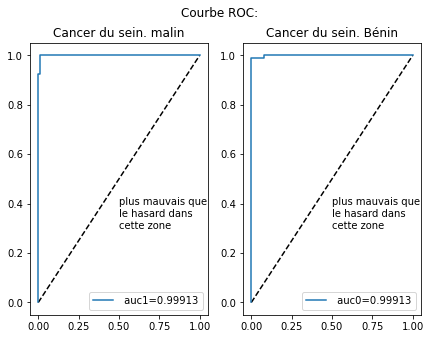

In [22]:
# http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_color.html

voisin= 34
metric= ["euclidean", "manhattan", "chebyshev", "minkowski"]

modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metric[0])
modelKNN.fit(x_entrainement_std, y_entrainement)

precision= modelKNN.score(x_test_std, y_test)
y_pred= modelKNN.predict(x_test_std)
y_pred_proba= modelKNN.predict_proba(x_test_std)

fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred_proba[:,0], pos_label= modelKNN.classes_[0])
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba[:,1], pos_label= modelKNN.classes_[1])

fig, ax = plt.subplots(1, 2, figsize=(7,5))

aucf1 = auc(fpr1, tpr1)  # seconde façon
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].plot(fpr1, tpr1, label=  f' auc1={aucf1:1.5f}')
ax[0].text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax[0].set_title('Cancer du sein. malin')
ax[0].legend();

aucf0 = auc(fpr0, tpr0)  # seconde façon
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].plot(fpr0, tpr0, label=  f' auc0={aucf0:1.5f}')
ax[1].text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax[1].set_title('Cancer du sein. Bénin')
ax[1].legend();

_= fig.suptitle("Courbe ROC:")



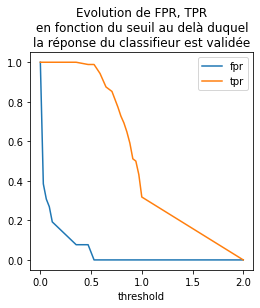

In [23]:
dftp = pds.DataFrame(dict(fpr= fpr0, tpr= tpr0, threshold= thresholds0))
#print(dftp.head(n=2))

ax = dftp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(4, 4))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée");


## 14. Utiliser la validation croisée K-Fold :  
Il s’agit d’une technique de validation croisée
pour améliorer les performances du modèle. La validation croisée est une méthode
statistique d'évaluation des performances de généralisation. Elle est plus stable et
plus approfondie que l'utilisation d'un fractionnement train-test pour évaluer les
performances du modèle.


In [24]:
voisin= 34
cval= 5


print(f"Score sur le jeux de test: {100*classifier_KNN.score(x_test_std, y_test):.2f} %")

# Le score est meilleur sur les donnée de test!!! Bizarre autant qu'étrange
print(f"Score sur le jeux de d'entrainement: {100*classifier_KNN.score(x_entrainement_std, y_entrainement):.2f} %.") 

B11.stats_cross_val("Standard Scaler", x_entrainement_std, y_entrainement, cval, voisin)


Score sur le jeux de test: 99.12 %
Score sur le jeux de d'entrainement: 95.38 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 34.
La précision obtenu sur les 5 échantillons est de 93.41 %, 91.21 %, 95.60 %, 95.60 %, 97.80 %. La moyenne des scores est: 94.73 % et l'écart type de 2.24 %.


In [25]:
cval= 5
for i in range (1,35):
    B11.stats_cross_val("Standard Scaler", x_entrainement_std, y_entrainement, cval, i)


Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 1.
La précision obtenu sur les 5 échantillons est de 96.70 %, 94.51 %, 97.80 %, 96.70 %, 93.41 %. La moyenne des scores est: 95.82 % et l'écart type de 1.62 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 2.
La précision obtenu sur les 5 échantillons est de 96.70 %, 96.70 %, 95.60 %, 95.60 %, 95.60 %. La moyenne des scores est: 96.04 % et l'écart type de 0.54 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 3.
La précision obtenu sur les 5 échantillons est de 95.60 %, 95.60 %, 94.51 %, 96.70 %, 97.80 %. La moyenne des scores est: 96.04 % et l'écart type de 1.12 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 4.
La précision obtenu sur les 5 échantillons est de 96.70 %, 95.60 %, 96.70 %, 96.70 %,

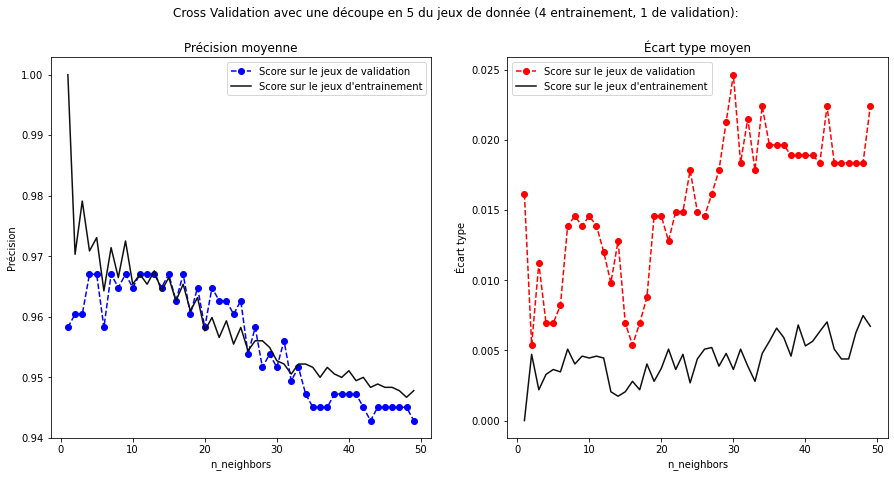

In [26]:
#------------------------------- Courbe de validation pour la validation croisée ------------------------------------------
#
# 9'44'' de la vidéo de machine learnia: https://www.youtube.com/watch?v=w_bLGK4Pteo&t=508s
#

model= KNeighborsClassifier()
k= np.arange(1,50)
cval= 5
score_entrainement, score_validation= validation_curve(model, x_entrainement_std, y_entrainement, param_name= "n_neighbors", param_range= k, cv= cval)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(k,  score_validation.mean(axis= 1),linestyle='dashed', marker='o', color= "blue", label= "Score sur le jeux de validation")
axs[0].plot(k,  score_entrainement.mean(axis= 1),linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Précision')
axs[0].set_title('Précision moyenne')
axs[0].legend()

axs[1].plot(k,  score_validation.std(axis= 1),linestyle='dashed', marker='o', color= "red", label= "Score sur le jeux de validation")
axs[1].plot(k,  score_entrainement.std(axis= 1),linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[1].set_xlabel('n_neighbors')
axs[1].set_ylabel('Écart type')
axs[1].set_title('Écart type moyen')
axs[1].legend()

_= fig.suptitle(f"Cross Validation avec une découpe en {cval} du jeux de donnée ({cval-1} entrainement, 1 de validation):")


**Les résultats sont assez inantendu.** Le nombre de voisins optimum calculer précédément ne correspond plus à un meilleur score.  
Le scoring sur le jeux d'entrainement est moin bon que sur le jeux de test.  
**Les courbes de validation permettent de repérer des zones d'overfitting**. Quand la précision sur le jeux d'entrainement est trés bonne et que, dans le même temps, les scores sur le jeux de test ou de validation sont moins bon. Ici on peut dire qu'il faudra un nombre de voisin au moins supérieur à 5 voir supérieur ou égal à 10.  
On a aussi une zone avec des score trés ressérer (écart type faible) et une bonne précision autour de 14 à 18. **15 et 16** voisins seraient un bon choix avec cette nouvelle étude qui contraste avec le 34 de la 1ère étude.


In [27]:
#------------------------------- Grid search CV pour optimisation des autres paramètres ------------------------------------------
#
# 12'46'' de la vidéo de machine learnia: https://www.youtube.com/watch?v=w_bLGK4Pteo&t=508s
# ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]

model= KNeighborsClassifier()
k= np.arange(1,50)
cval= 5

parametres_grid= {"n_neighbors": k, "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}
grid= GridSearchCV(model, parametres_grid, cv= cval)

In [28]:
grid.fit(x_entrainement_std, y_entrainement)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [29]:
print(f"Les meilleurs paramètres d'après gridsearchcv serait: {grid.best_params_} pour un score de: {100*grid.best_score_:.2f}.")


Les meilleurs paramètres d'après gridsearchcv serait: {'metric': 'manhattan', 'n_neighbors': 3} pour un score de: 97.36.


In [30]:
model= grid.best_estimator_
print(f"Sur notre jeux de test, ce modèle obiendrait un score de {100*model.score(x_test_std, y_test):.2f}")

Sur notre jeux de test, ce modèle obiendrait un score de 93.86


**Ce résultat remet en cause les 2 autres études pour déterminer le meilleur modèle. On pourrait tester le métrique "manhattan" sur KNN.**

In [31]:
model= KNeighborsClassifier()
k= np.arange(12,40)
cval= 5

parametres_grid= {"n_neighbors": k, "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}
grid= GridSearchCV(model, parametres_grid, cv= cval)

In [32]:
grid.fit(x_entrainement_std, y_entrainement)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])})

In [33]:
print(f"Les meilleurs paramètres d'après gridsearchcv serait: {grid.best_params_} pour un score de: {100*grid.best_score_:.2f}.")

Les meilleurs paramètres d'après gridsearchcv serait: {'metric': 'euclidean', 'n_neighbors': 12} pour un score de: 96.70.


In [34]:
model= grid.best_estimator_
print(f"Sur notre jeux de test, ce modèle obiendrait un score de {100*model.score(x_test_std, y_test):.2f}")

Sur notre jeux de test, ce modèle obiendrait un score de 95.61


Avec d'autres paramètres, on améliore la qualité de précision sur le jeux de test, avec une précision moins bonne sur le jeux d'entrainement....  
**Difficile de conclure sur la pertinence de GridSearchCV** 

## Learning Curve (hors brief)  
Une autre optimisation concerne la taille du jeux d'entrainement par rapport au jeux de test. Au dela d'un certain seuil, le modèle ne s'améliore plus et des données d'entrainements supplémentaires ne servent à rien.

In [35]:
voisin= 15
cval= 5
metrique= "euclidean"
modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metrique)

taille, train_score, val_score= learning_curve(modelKNN, x_entrainement_std, y_entrainement, train_sizes= np.linspace(0.1, 1, 10),\
                                               cv= cval)


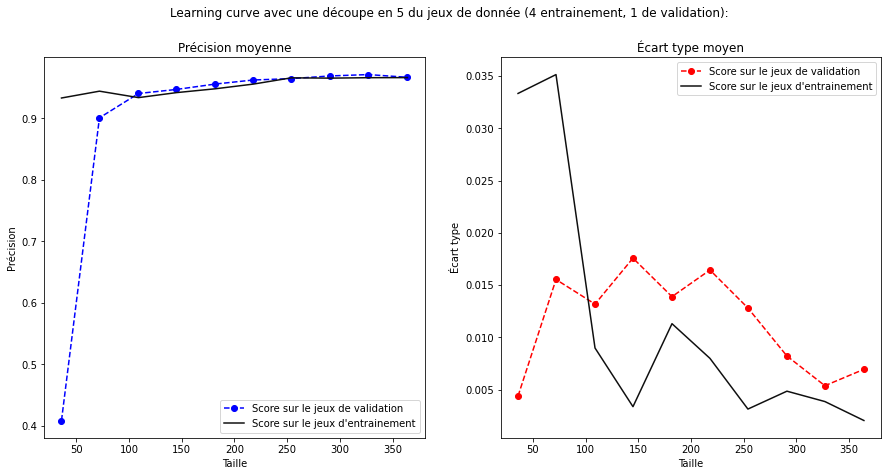

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(taille, val_score.mean(axis= 1),linestyle='dashed', marker='o', color= "blue", label= "Score sur le jeux de validation")
axs[0].plot(taille, train_score.mean(axis= 1), linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[0].set_xlabel('Taille')
axs[0].set_ylabel('Précision')
axs[0].set_title('Précision moyenne')
axs[0].legend()

axs[1].plot(taille, val_score.std(axis= 1),linestyle='dashed', marker='o', color= "red", label= "Score sur le jeux de validation")
axs[1].plot(taille, train_score.std(axis= 1),linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[1].set_xlabel('Taille')
axs[1].set_ylabel('Écart type')
axs[1].set_title('Écart type moyen')
axs[1].legend()

_= fig.suptitle(f"Learning curve avec une découpe en {cval} du jeux de donnée ({cval-1} entrainement, 1 de validation):")


Une taille de 30% commence à donner des résultats corrects, au dela de 70% il n'y a plus d'amélioration notable.

## 15. Conclusion

Le KNN semble bien adapté à ce type de mesure (sans doute plus que le K-mean assez proche dans la méthodologie) compte tenu de la répartition des données voir la représentation qui en est faite (grace à l'utilisation de la pca).
Pour la cross validation, le choix s'est porté sur la méthode STRATIFIED K-FOLD (qui est l'option par défaut) plutôt que KFold car le jeux de donnée n'est pas homogène (37.2% / 62.8%).  
L'optimisation de l'agorithme pose plusieurs problèmes. Les 2 principaux paramètre de KNN ont un impact non négligeable sur les performances. L'utilisation de gridsearchCV et la cross validation ne m'ont pas permis de trancher sur les meilleurs paramètres à adopter, mais je serait plutôt en faveur d'un nombre de voisin élevé (34) et de la métric par défaut sur le KNN classifier. Avec un nombre de voisins faible, il semblerait que se soit la métric "manhattan" qui soit la meilleure.  
La précision zéro étant élevé (77%), les performances des prédictions doivent être à la hauteur et au dessus des 90 % ! Un soin particulier doit-être apporté au "faux négatifs" pour des raisons évidente. Ce score doit être de 0, quitte à dégradé les autres mesures.


## Bonus 1:

## Bonus 2:

### Essayons avec K-Mean

In [38]:
modelKMean= KMeans(n_clusters= 2, n_init= 10,)
modelKMean.fit(x_entrainement_std, y_entrainement)

predic_kmean= modelKMean.predict(x_test_std)

#print(y_test.reshape(-1,1))
#print(predic_kmean)

In [39]:
print(f"Inertia:\t{modelKMean.inertia_:.0f}\
\thomogénéité: {metrics.homogeneity_score(y_test, predic_kmean):.3f}\
\tcompletness: {metrics.completeness_score(y_test, predic_kmean):.3f}\
\tvvmeasure: {metrics.v_measure_score(y_test, predic_kmean):.3f}\
\tARI: {metrics.adjusted_rand_score(y_test, predic_kmean):.3f}\
\tAMI: {metrics.adjusted_mutual_info_score(y_test, predic_kmean):.3f}")


Inertia:	9181	homogénéité: 0.575	completness: 0.528	vvmeasure: 0.551	ARI: 0.688	AMI: 0.547


In [40]:
print(classification_report(y_test,y_pred, target_names=["Bénin","Malin"]))

              precision    recall  f1-score   support

       Bénin       1.00      0.99      0.99        88
       Malin       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Les metrics sont excellents, K-mean pourrait être employé.

### Avec un peu de change, la régression logistique pourrait fonctionner.

In [41]:
from sklearn.linear_model import LogisticRegression

modellreg= LogisticRegression()

reg= modellreg.fit(x_entrainement_std, y_entrainement)

print(f"score: {100*reg.score(x_test_std, y_test):.2f}%")


score: 92.98%


La régression logistique pourrait être aussi utilisé, il faudrait chercher à optimiser les paramètres.